In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Iteration 0: a = 1.3665, b = 0.0999, cost = 0.1775, R² = 0.7012
Iteration 50: a = 2.0327, b = 3.2125, cost = 0.0287, R² = 0.9516
Iteration 100: a = 2.0327, b = 4.3460, cost = 0.0172, R² = 0.9710
Iteration 150: a = 2.0327, b = 4.7588, cost = 0.0157, R² = 0.9735
Iteration 200: a = 2.0327, b = 4.9091, cost = 0.0155, R² = 0.9739
Iteration 250: a = 2.0327, b = 4.9638, cost = 0.0155, R² = 0.9739
Iteration 300: a = 2.0327, b = 4.9838, cost = 0.0155, R² = 0.9739
Iteration 350: a = 2.0327, b = 4.9910, cost = 0.0155, R² = 0.9739

Final results:
Estimated parameters: a = 2.0327, b = 4.9937
True parameters: a = 2.0000, b = 5.0000
Final R² score: 0.9739
Final MSE: 0.0155


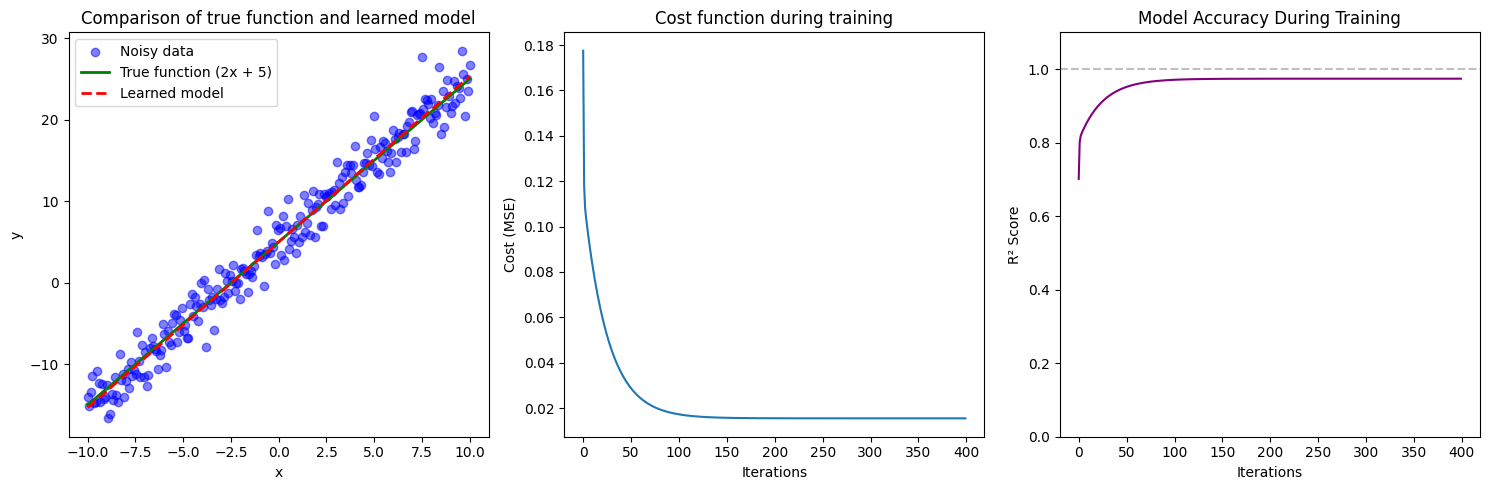

In [2]:
# 1. Define true function and generate samples
def true_function(x):
    return 2 * x + 5  # True function f(x) = 2x + 5

def generate_samples(n_samples=100, noise_std=1.0, x_range=(-10, 10)):
    """Generate samples with Gaussian noise"""
    np.random.seed(42)  # For reproducible results
    X = np.linspace(x_range[0], x_range[1], n_samples)
    y = true_function(X) + np.random.normal(0, noise_std, n_samples)
    return X, y

# 2. Calculate MSE cost function
def compute_cost(X, y, a, b):
    """Calculate Mean Squared Error (MSE)"""
    predictions = a * X + b
    return 1/n_samples*np.mean((y - predictions) ** 2)

# 3. Gradient descent algorithm
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """Gradient descent algorithm implementation"""
    # Initialize parameters
    a = 0.0  # Initial slope
    b = 0.0  # Initial intercept
    n = len(X)
    cost_history = []
    accuracy_history = []
    
    for i in range(n_iterations):
        # Calculate predictions
        y_pred = a * X + b
        
        # Compute gradients
        grad_a = (-2/n) * np.sum(X * (y - y_pred))  # Gradient for slope
        grad_b = (-2/n) * np.sum(y - y_pred)        # Gradient for intercept
        
        # Update parameters
        a = a - learning_rate * grad_a
        b = b - learning_rate * grad_b
        
        # Store cost and accuracy history
        cost = compute_cost(X, y, a, b)
        cost_history.append(cost)
        accuracy = r2_score(y, a*X + b)
        accuracy_history.append(accuracy)
        
        # Print progress every 50 iterations
        if i % 50 == 0:
            print(f"Iteration {i}: a = {a:.4f}, b = {b:.4f}, cost = {cost:.4f}, R² = {accuracy:.4f}")
    
    return a, b, cost_history, accuracy_history

# 4. Generate data
n_samples = 240
X, y = generate_samples(n_samples=n_samples, noise_std=2)

# 5. Run gradient descent
learning_rate = 0.01
n_iterations = 400
a, b, cost_history, accuracy_history = gradient_descent(X, y, learning_rate, n_iterations)

# 6. Show final results
print("\nFinal results:")
print(f"Estimated parameters: a = {a:.4f}, b = {b:.4f}")
print(f"True parameters: a = 2.0000, b = 5.0000")
print(f"Final R² score: {r2_score(y, a*X + b):.4f}")
print(f"Final MSE: {compute_cost(X, y, a, b):.4f}")  # اضافه کردن خطای نهایی


# 7. Plot results
plt.figure(figsize=(15, 5))

# Plot 1: Data and regression lines
plt.subplot(1, 3, 1)
plt.scatter(X, y, color='blue', alpha=0.5, label='Noisy data')
plt.plot(X, true_function(X), 'g-', linewidth=2, label='True function (2x + 5)')
plt.plot(X, a*X + b, 'r--', linewidth=2, label='Learned model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of true function and learned model')

# Plot 2: Cost function over iterations
plt.subplot(1, 3, 2)
plt.plot(range(n_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost function during training')

# Plot 3: Model accuracy (R² score) over iterations
plt.subplot(1, 3, 3)
plt.plot(range(n_iterations), accuracy_history, color='purple')
plt.xlabel('Iterations')
plt.ylabel('R² Score')
plt.title('Model Accuracy During Training')
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5)
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

In [ ]:
# Finish